In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Hyderabad_House_Data.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'Bedrooms', 'Washrooms', 'Furnishing', 'Tennants', 'Area',
       'Price', 'Locality'],
      dtype='object')

In [4]:
data.head()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [5]:
data.tail()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
1166,1166,2 BHK Apartment,1,Unfurnished,Family,900 sqft,"15,000",KPHB Road
1167,1167,1 BHK Apartment,1,Semi-Furnished,Bachelors/Family,East Facing Property,"10,000","Miyapur, NH"
1168,1168,3 BHK Apartment,1,Unfurnished,Bachelors,1515 sqft,"14,000","Pragathi Nagar, Kukatpally"
1169,1169,3 BHK Apartment,From Nov '19,Family,3,1500 sqft,"16,000","Habsiguda, NH"
1170,1170,2 BHK Apartment,2,Semi-Furnished,Bachelors/Family,1100 sqft,"12,000","Umas Aadya and Arha Mensions, Kukatpally, NH"


In [6]:
data.shape

(1171, 8)

In [7]:
data.describe()

,Unnamed: 0
count,1171.000000
mean,585.000000
std,338.182889
min,0.000000
25%,292.500000
50%,585.000000
75%,877.500000
max,1170.000000


In [8]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms     21
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

In [9]:
data['Washrooms'] = pd.to_numeric(data['Washrooms'], errors='coerce')

In [10]:
data['Washrooms']=data['Washrooms'].fillna(data['Washrooms'].median())

In [11]:
data.isnull()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1166,False,False,False,False,False,False,False,False
1167,False,False,False,False,False,False,False,False
1168,False,False,False,False,False,False,False,False
1169,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms      0
Furnishing     0
Tennants       1
Area          22
Price          0
Locality       0
dtype: int64

In [13]:
data['Tennants'] = pd.to_numeric(data['Tennants'], errors='coerce')

In [14]:
data['Tennants']=data['Tennants'].fillna(data['Tennants'].median())

In [15]:
data.isnull()

,Unnamed: 0,Bedrooms,Washrooms,Furnishing,Tennants,Area,Price,Locality
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1166,False,False,False,False,False,False,False,False
1167,False,False,False,False,False,False,False,False
1168,False,False,False,False,False,False,False,False
1169,False,False,False,False,False,False,False,False


In [16]:
data.isnull().sum()

Unnamed: 0     0
Bedrooms       0
Washrooms      0
Furnishing     0
Tennants       0
Area          22
Price          0
Locality       0
dtype: int64

In [17]:
data['Area'] = data['Area'].astype(str).str.extract('(\d+)')

In [18]:
data['Area']=pd.to_numeric(data['Area'],errors='coerce')

In [19]:
data['Area']=data['Area'].fillna(data['Area'].median())

In [20]:
data[['Washrooms','Area']].isnull().sum()

Washrooms    0
Area         0
dtype: int64

In [21]:
data['Price'] = (
    data['Price']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
)


In [22]:
data['Price']=data['Price'].astype(float)

In [23]:
data['Price'].dtype

dtype('float64')

In [24]:
data['Price'].apply(type).value_counts()

Price
<class 'float'>    1171
Name: count, dtype: int64

In [25]:
x=data.drop('Price',axis=1)
y=data['Price']

In [26]:
x=pd.get_dummies(x,drop_first=True)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
print(x_train.dtype)
print(y_train.dtype)

float64
float64


In [31]:
y_pred = model.predict(x_test)


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2= r2_score(y_test, y_pred)

print("MAE:", mae)

print("MSE:", mse)

print("RMSE:", rmse)

print("R2 Score:", r2)

MAE: 5380.825496537841
MSE: 53398077.53526923
RMSE: 7307.398821418551
R2 Score: 0.558235307243758


In [39]:
new_house=pd.DataFrame({
    'Area': [1400],
    'Bedrooms': [6],
    'Washrooms': [3]
})
new_house = pd.get_dummies(new_house)
new_house = new_house.reindex(columns=x.columns, fill_value=0)
new_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_scaled)
print("predicted House Price:", predicted_price[0])





predicted House Price: 22059.542898483247


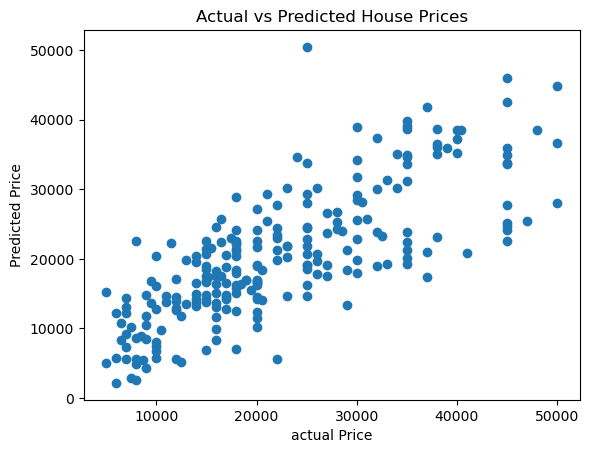

In [40]:
plt.scatter(y_test, y_pred)

plt.xlabel("actual Price")

plt.ylabel('Predicted Price')

plt.title('Actual vs Predicted House Prices')

plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
